In [2]:
import pandas as pd
import numpy as np

# Load dataset
data_path = r"E:\amr\Pr_ML\enhanced_dataset.csv"
df = pd.read_csv(data_path)

print("shape:", df.shape)

shape: (105645, 29)


In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105645 entries, 0 to 105644
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   student_id             105645 non-null  int64  
 1   name                   105645 non-null  object 
 2   email                  105645 non-null  object 
 3   gender                 105645 non-null  object 
 4   major                  105645 non-null  object 
 5   gpa                    105645 non-null  float64
 6   country                105645 non-null  object 
 7   enrollment_year        105645 non-null  int64  
 8   year_level             105645 non-null  object 
 9   student_name           105645 non-null  object 
 10  subject                105645 non-null  object 
 11  quiz_date              105645 non-null  object 
 12  device_used            105645 non-null  object 
 13  status                 105645 non-null  object 
 14  quiz_id                105644 non-nu

,student_id,name,email,gender,major,gpa,country,enrollment_year,year_level,student_name,...,Quizzes_Avg,prev_score,Study_Hours_per_Week,Attendance (%),Participation_Score,Stress_Level,Sleep_Hours_per_Night,time_spent,clickstream,activity
0,372011,Shandie Phant L,sphantab11@xinhuanet.com,Female,Data Science,3.23,Peru,2019,Freshman,Shandie Phant L,...,51.020408,85,96.0,96.981906,50,44.444444,11.233975,90.000000,normal,online_courses
1,45201,Emile Ellacott T,eellacott18201@plala.or.jp,Male,Economics,3.07,Peru,2020,Senior,Solly Stops,...,77.551020,69,12.0,26.602468,0,100.000000,0.000000,12.962963,unusual,none
2,228592,Nevin Pfeffel U,npfeffel6b592@howstuffworks.com,Male,Biology,2.20,Thailand,2022,Junior,Nevin Pfeffel U,...,83.673469,93,0.0,17.068649,40,66.666667,0.000000,10.000000,normal,none
3,179202,Trix Peat U,tpeat4y202@shop-pro.jp,Female,Data Science,2.35,Yemen,2024,Sophomore,Carolus Blowne,...,46.938776,42,84.0,66.274547,40,77.777778,0.000000,95.185185,unusual,online_forum
4,443202,Pall Fotherby U,pfotherbyca202@howstuffworks.com,Male,Psychology,2.79,China,2022,Freshman,Ardelis Rojahn,...,97.959184,58,84.0,57.436822,50,66.666667,0.000000,87.777778,unusual,study_group


In [4]:
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts[missing_counts > 0])


Missing values per column:
 quiz_id           1
duration_limit    1
question_count    1
dtype: int64


In [5]:
df.shape

(105645, 29)

In [6]:
# Define features and target
features = ['Midterm_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Study_Hours_per_Week', 'Attendance (%)']
target = 'prev_score'

# Select those columns + target
df_sel = df[features + [target]].copy()

# Drop rows with missing target or features (simple, safe method)
df_sel.dropna(inplace=True)

print("Shape after dropping missing values:", df_sel.shape)
print(df_sel.isnull().sum())


Shape after dropping missing values: (105645, 6)
Midterm_Score           0
Assignments_Avg         0
Quizzes_Avg             0
Study_Hours_per_Week    0
Attendance (%)          0
prev_score              0
dtype: int64


In [7]:
print(df_sel.dtypes)

# If any feature columns are not numeric, convert them
for col in features + [target]:
    df_sel[col] = pd.to_numeric(df_sel[col], errors='coerce')

# After conversion, drop any new NaNs created by coercion
df_sel.dropna(inplace=True)
print("Shape after type conversion and dropping NaNs:", df_sel.shape)


Midterm_Score           float64
Assignments_Avg         float64
Quizzes_Avg             float64
Study_Hours_per_Week    float64
Attendance (%)          float64
prev_score                int64
dtype: object
Shape after type conversion and dropping NaNs: (105645, 6)


In [8]:
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        before = df.shape[0]
        df = df[(df[col] >= lower) & (df[col] <= upper)]
        after = df.shape[0]
        print(f"Removed {before - after} outliers from {col}")
    return df

numeric_cols = features + [target]
df_clean = remove_outliers_iqr(df_sel, numeric_cols)

print("Shape after outlier removal:", df_clean.shape)


Removed 0 outliers from Midterm_Score
Removed 0 outliers from Assignments_Avg
Removed 0 outliers from Quizzes_Avg
Removed 0 outliers from Study_Hours_per_Week
Removed 0 outliers from Attendance (%)
Removed 0 outliers from prev_score
Shape after outlier removal: (105645, 6)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df_clean[features]
y = df_clean[target]

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

print(X_scaled.head())


   Midterm_Score  Assignments_Avg  Quizzes_Avg  Study_Hours_per_Week  \
0       1.563633         0.301406     0.031697              1.533265   
1      -0.035184         0.474525     0.931730             -1.269918   
2       1.702661        -0.823865     1.139430             -1.670373   
3      -1.494974        -0.131390    -0.106769              1.132810   
4      -0.730322        -1.256661     1.624063              1.132810   

   Attendance (%)  
0        1.818796  
1       -1.060004  
2       -1.449976  
3        0.562743  
4        0.201244  


In [10]:
cleaned_path = r"E:\amr\Pr_ML\enhanced_dataset_cleaned.csv"
cleaned_df = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)
cleaned_df.to_csv(cleaned_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_path}")


Cleaned dataset saved to: E:\amr\Pr_ML\enhanced_dataset_cleaned.csv


In [11]:
# Load the cleaned dataset
cleaned_data_path = r"E:\amr\Pr_ML\enhanced_dataset_cleaned.csv"
cleaned_df = pd.read_csv(cleaned_data_path)

# Split the data back into features (X) and target (y)
X = cleaned_df.drop(columns=['prev_score'])  # Features
y = cleaned_df['prev_score']  # Target

X.head()

,Midterm_Score,Assignments_Avg,Quizzes_Avg,Study_Hours_per_Week,Attendance (%)
0,1.563633,0.301406,0.031697,1.533265,1.818796
1,-0.035184,0.474525,0.931730,-1.269918,-1.060004
2,1.702661,-0.823865,1.139430,-1.670373,-1.449976
3,-1.494974,-0.131390,-0.106769,1.132810,0.562743
4,-0.730322,-1.256661,1.624063,1.132810,0.201244


In [12]:
y.head()


0    85
1    69
2    93
3    42
4    58
Name: prev_score, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (84516, 5)
Testing data shape: (21129, 5)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression >>  MSE >> {mse_lr:.4f}")
print(f"Linear Regression >> R² >> {r2_lr:.4f}")


Linear Regression >>  MSE >> 8.2721
Linear Regression >> R² >> 0.9613


In [15]:
errors = y_test - y_pred_lr
squared_errors = errors ** 2
mse_manual = np.mean(squared_errors)
print(f"MSE: {mse_manual:.4f}")


MSE: 8.2721


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


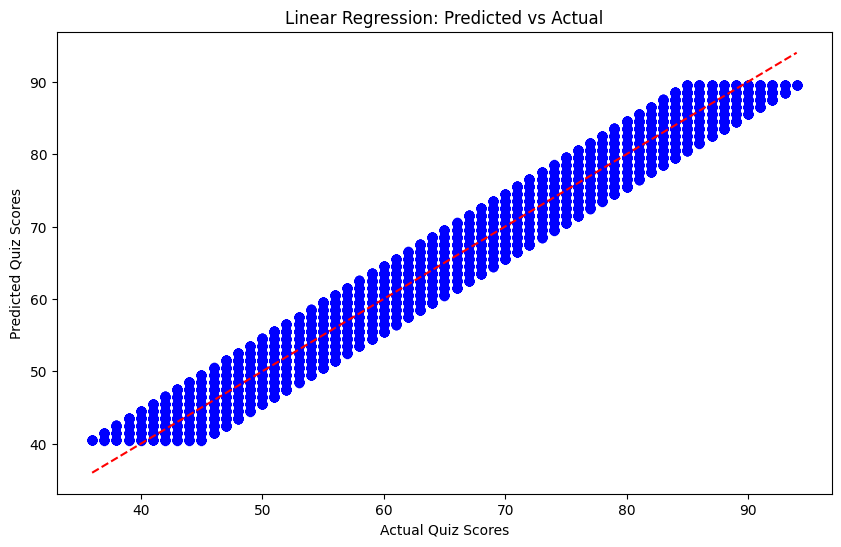

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Quiz Scores')
plt.ylabel('Predicted Quiz Scores')
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regressor - MSE: {mse_knn:.4f}")
print(f"KNN Regressor - R²: {r2_knn:.4f}")


KNN Regressor - MSE: 10.5947
KNN Regressor - R²: 0.9505


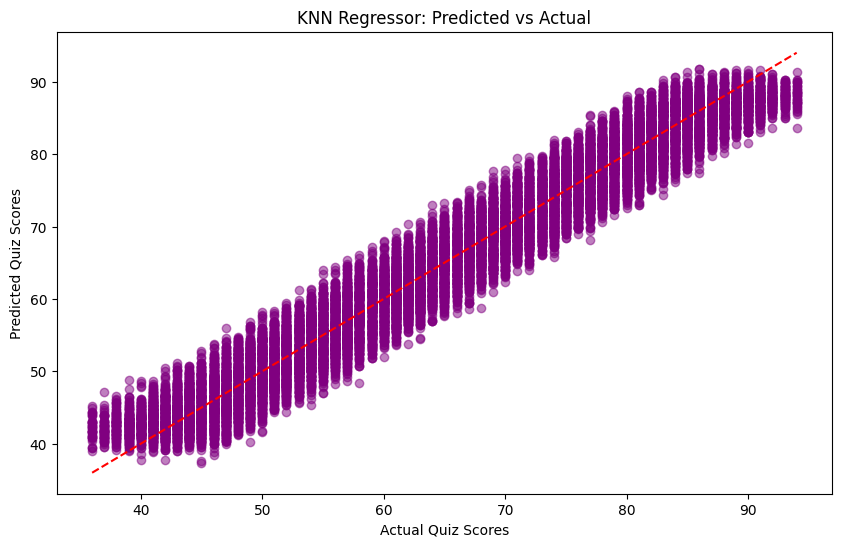

In [19]:
# KNN - Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('KNN Regressor: Predicted vs Actual')
plt.xlabel('Actual Quiz Scores')
plt.ylabel('Predicted Quiz Scores')
plt.show()


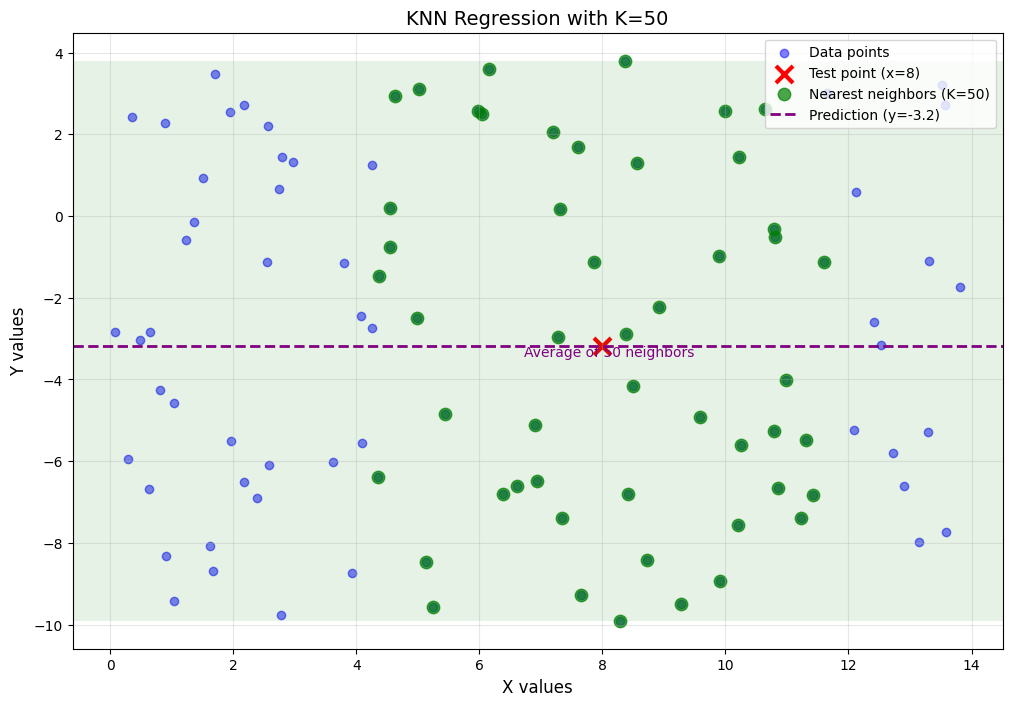

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Generate some sample data with more points
np.random.seed(42)
X = np.random.uniform(0, 14, 100)  # More points for K=50
y = np.random.uniform(-10, 4, 100)

# Create a test point
test_point = np.array([[8]])

# Fit KNN model with K=50
knn = KNeighborsRegressor(n_neighbors=50)
knn.fit(X.reshape(-1, 1), y)

# Get the 50 nearest neighbors
distances, indices = knn.kneighbors(test_point)
neighbors_X = X[indices[0]]
neighbors_y = y[indices[0]]

# Make prediction
prediction = knn.predict(test_point)[0]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot all data points
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')

# Highlight the test point
plt.scatter(test_point, prediction, color='red', s=150, marker='x', 
            linewidth=3, label=f'Test point (x={test_point[0][0]})')

# Highlight the nearest neighbors (just show them, not all 50 lines)
plt.scatter(neighbors_X, neighbors_y, color='green', alpha=0.7, 
            s=80, label='Nearest neighbors (K=50)')

# Show the prediction area (shaded region)
plt.axhspan(ymin=np.min(neighbors_y), ymax=np.max(neighbors_y), 
            facecolor='green', alpha=0.1)

# Show the prediction line
plt.axhline(y=prediction, color='purple', linestyle='--', 
            linewidth=2, label=f'Prediction (y={prediction:.1f})')

# Add labels and legend
plt.title('KNN Regression with K=50', fontsize=14)
plt.xlabel('X values', fontsize=12)
plt.ylabel('Y values', fontsize=12)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.3)

# Annotate some key information
plt.annotate(f'Average of {knn.n_neighbors} neighbors', 
             xy=(test_point[0][0], prediction), 
             xytext=(5, -8), textcoords='offset points',
             ha='center', fontsize=10, color='purple')

plt.show()

In [20]:
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, eval_metric='rmse')

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb:.4f}")
print(f"XGBoost - R²: {r2_xgb:.4f}")


XGBoost - MSE: 8.4610
XGBoost - R²: 0.9605


In [24]:
results = {
    'Model': ['Linear Regression', 'XGBoost', 'KNN Regressor'],
    'MSE': [mse_lr, mse_xgb, mse_knn],
    'R²': [r2_lr, r2_xgb, r2_knn]
}

# Create a DataFrame from the updated results dictionary
results_df = pd.DataFrame(results)
results_df


,Model,MSE,R²
0,Linear Regression,8.272060,0.961340
1,XGBoost,8.460984,0.960457
2,KNN Regressor,10.594684,0.950485
